###### Material desenvolvido para o minicurso: Introdução à solução numérica de EDP's, ministrado no ERMAC/2018 de 5 a 6 de abril de 2018 na Universidade Federal de Lavras, Lavras/MG, Brasil. Autor: [Jonas Laerte Ansoni](http://jonasansoni.blogspot.com.br/).

<img src="./figuras/logoemarc.png" width="30%">

# <center> Minicurso:<font color='blue'> Introdução à solução numérica de EDP's

## 4. Equações elípticas

Já vimos em aulas passadas o método de diferenças finitas para equações diferenciais parciais (EDP's) e o caso envolvendo o problema de convecção e difusão, onde em ambos os casos envolvem a variação temporal das grandezas físicas de interesse. Mas e os casos relacionados com problemas de equílibrio?

### 4.1. Equação de Poisson

Muito problemas na física não tem dependencia do tempo. Matematicamente, esses problemas são representados por equações diferenciais parciais elípticas. Dentre os fenômenos modelados por equações elípticas, podemos citar a distribuição de pressão dentro de um escoamento incompressível, percolação de água sob uma represa e o campo elétrico perto da extremidade de um material condutor. Todos esses casos podem ser modelados pela a __Equação de Poisson__:

\begin{equation}
\label{poisson}
\nabla^2 \phi = f
\tag{1}
\end{equation}

onde $\phi$ (desconhecida) e $f$ (conhecida) são funções do espaço, em um domínio $\Omega$. Para encontrar a solução, exigimos condições de contorno. Estas poderiam ser as condições de contorno de Dirichlet, especificando o valor da solução na fronteira,

\begin{equation}
\phi = b_1 \text{ no } \partial\Omega,
\end{equation}

ou condições de fronteira do tipo de Neumann, especificando a derivada normal da solução na fronteira, 

\begin{equation}
\frac{\partial \phi}{\partial n} = b_2 \text{ no } \partial\Omega.
\end{equation}

Um problema de valor de contorno consiste em encontrar $u$, dadas as informações acima. Numericamente, podemos fazer isso usando *métodos de relaxamento* (método de Jacobi, Gauss-Seidel, SOR), que começam com um palpite inicial de $\phi$ e depois iteram para a solução. Vamos descobrir como!


### 4.2. Equação de Laplce

O caso particular em que $f=0$ (homogênio) resulta na equação de Laplace (em coordenadas cartesianas bidimensionais):

\begin{equation}
\label{laplace}
\nabla^2 \phi = \frac{\partial^2 \phi}{\partial x^2}+\frac{\partial^2 \phi}{\partial y^2}= 0,
\tag{2}
\end{equation}
em que $\phi$ é a variável dependente e $\nabla^2$ é o operador laplaciano, em que coordenadas cartesianas bidimencionais, é dado por 

\begin{equation}
\nabla^2=\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}.
\end{equation}

A solução única para esse tipo de problemas é obtida especificando-se condições sobre a variável dependente na fronteira $\partial\Omega$ da região $\Omega$, em que se quer resolver o problema. Problemas que exigem condições ao longo da fronteira (contorno) $\partial\Omega$ de _toda_ a região são denominadas de __problemas de valor de contorno__ (PVC).

#### 4.2.1 Equação de calor em estado estacionário

<img src="./figuras/fig1.png" align="center" alt="Drawing" style="width: 350px;" label=placa>

#### <center> Figure 1. Chapa plana cujas bordas são mantidas a diferentes temperaturas .

Como exemplo considere a chapa plana de metal mostrada na Figura \ref{placa}. Ela está termicamente isolada nas faces, possui espessura desprezível e só pode trocar calor pelas bordas laterais, que são mantidas às temperaturas constantes.

Quando a placa está em equílio térmico, a temperatura $T$ em cada ponto *interno* (isto é, que não esteja na borda) satisfaz a equação \ref{laplace} com $\phi=T$, ou seja:

\begin{equation}
\nabla^2 T = \frac{\partial^2 T}{\partial x^2}+\frac{\partial^2 T}{\partial y^2}=0,
\tag{3}
\end{equation}

onde $x$ e $y$ são funções da pocisão em coordenadas cartesianas.

Aqui precisamos resolver a form 2D da equação de Laplace, satisfazendo as condições de contono representadas na figura \ref{placa}.

O que faremos é encontrar a temperatura no estado estacionário dentro da placa 2D (o que também significa a solução da equação de Laplace), com as condições de contorno indicadas (temperatura da borda da placa). Em seguida, vamos discretizar a região do placa em uma malha computacional, e então discretizamos a equação de Laplace acima com método de diferenças finitas. Esta é a região discretizada da placa.

<img src="./figuras/fig2.png" align="center" alt="Drawing" style="width: 480px;">
#### <center> Figure 2. Malha computacional do problema.

#### Discretização em diferenças finitas

Como realizado para a equação da difusão previamente discutida, vamos discretizar os termos derivativos de segunda ordem por meio de diferenças centrais de segunda ordem. Em uma malha cartesiana bidimensional, temos:

\begin{equation}
\frac{T_{i+1, j} - 2T_{i,j} + T_{i-1,j} }{\Delta x^2} + \frac{T_{i,j+1} - 2T_{i,j} + T_{i, j-1} }{\Delta y^2} = 0.
\tag{4}
\end{equation}

A equação anterior pode ser escrita como:

\begin{equation}
T_{i+1,j} - 2T_{i,j} + T_{i-1,j} + \beta^2 (p_{i,j+1} - 2 p_{i,j} + p_{i, j-1} = 0
\tag{5}
\end{equation}

onde $\beta = \frac{\Delta x}{\Delta y}$.

Quando definimos $\Delta x = \Delta y$, obtemos a seguinte equação:

\begin{equation}
T_{i+1, j} + T_{i-1,j} + T_{i,j+1}  + T_{i, j-1}- 4 T_{i,j} = 0
\tag{6}
\label{edf}
\end{equation}

Isso nos diz que o operador diferencial Laplaciano no ponto de grade $(i,j)$ pode ser avaliado discretamente usando o valor de $T$ nesse ponto (com um fator $-4$) e os quatro pontos vizinhos à esquerda, direita, acima e abaixo do ponto da grade $(i, j)$.

### <span class="badge badge-pill badge-warning">_Pergunta:_</span> <font color='Orange'> Como é o estêncil do método?</font>
    
### <span class="badge badge-pill badge-success">Resposta: </span> 
O estêncil do operador Laplaciano discreto é mostrado na Figura 3. Normalmente é chamado de *estêncil de cinco pontos*, por razões óbvias.
<img src="./figuras/laplace.svg" align="center">
#### <center> Figure 3. Estêncil da equação de diferenças finitas \ref{edf}.

A equação discreta acima (Eq. /ref{edf}) é válida para todos os pontos interiores do domínio. Se escrevermos as equações para *todos* pontos interiores, temos um sistema linear de equações algébricas. A solução deste sistema pode ser obtida por métodos diretos ou iterativos. 

Para resolver o problema, usamos um __"chute inicial"__ para os pontos interiores da malha (nós verdes Fig. 4). Inicialmente utilizamos $30^oC$ (ou podemos configurá-lo $35^oC$ ou outro valor), porque não conhecemos o valor dentro da malha (claro, esses são os valores que queremos saber). 

No processo iterativo, o valor da temperatura interior da malha irá se ajustando "autocorrigindo", então, quando mais próximo da solução real é o chute inicial, mais rápido obtemos uma solução.

<img src="./figuras/fig4.png" align="center" alt="Drawing" style="width: 400px;">
#### <center> Figure 4. Malha computacional com os valores iniciais.

##### Tarefa desafio

Pegue um pedaço de papel e escreva a matriz do coeficiente para uma discretização com 7 pontos de grade na direção $x$ (5 pontos interiores) e 5 pontos na direção $y$ (3 interiores). O sistema deve ter 15 incógnitas e o coeficiente matriz três blocos diagonais. Assuma as condições de contorno prescritas de Dirichlet em todos os lados (não necessariamente zero).

### Vamos ao código!!!

A idéia deste código e de demonstrar de forma didática a implementação do método, você já deve ser capaz de implementar um código mais eficiente.

Se você fez o exercício anterior, observou que a matriz de coeficiente de tal sistema linear tem principalmente zeros. Para uma grade espacial uniforme, a matriz é * diagonal de blocos*. Os métodos iterativos são particularmente adequados para um sistema com essa estrutura e nos poupam de armazenar todos esses zeros.

Vamos começar com um chute inicial para a solução, $T_{i, j}^{0}$, e usar o Laplaciano discreto para obter uma atualização, $ T_{i, j}^{1}$, depois continuar computando $T_{i, j}^{k}$ até ficarmos felizes. Note que $k$ _não_ é um índice de tempo aqui, mas um índice correspondente ao número de iterações que realizamos no *esquema de relaxamento*.

Em cada iteração, calculamos os valores atualizados $T_{i, j}^{k+1}$ de uma maneira (esperançosamente) inteligente para que eles convirjam para um conjunto de valores satisfazendo a equação de Laplace. O sistema atingirá o equilíbrio apenas quando o número de iterações tende a $\infty$, mas podemos aproximar o estado de equilíbrio por iterar até que a mudança entre uma iteração e a próxima seja *muito* pequena.

O método mais intuitivo de solução iterativa é conhecido como o [**método Jacobi**](https://en.wikipedia.org/wiki/Jacobi_method), no qual os valores nos pontos da grade são substituídos pelas médias ponderadas correspondentes:


\begin{equation}
T^{k+1}_{i,j} = \frac{1}{4} \left(T^{k}_{i,j-1} + T^k_{i,j+1} + T^{k}_{i-1,j} + T^k_{i+1,j} \right)
\end{equation}

Lembrando que é para malhas igualmente espaçadas!!!

In [1]:
# Simple Numerical Laplace Equation Solution using Finite Difference Method

import numpy as np
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
#Parameters
nx = 41
ny = 41
l2_target = 1e-3
maxIter=1000

L = 10
H = 10

# Boundary condition
Ttop = 100
Tbottom = 0
Tleft = 0
Tright = 0

# Initial guess of interior grid
Tguess = 30

# Set colour interpolation and colour map
colorinterpolation = 50
colourMap = plt.cm.jet #you can try: colourMap = plt.cm.coolwarm

O `np.meshgrid()` cria a grade de malha para nós (usamos isso para plotar a solução), o primeiro parâmetro é para a dimensão x, e o segundo parâmetro é para a dimensão y. Usamos np.arange () para arange array 1-D com o valor do elemento começa de algum valor para algum valor, no nosso caso é de `0` para `lenX` e de `0` para `lenY`. Em seguida, definimos a região: definimos a matriz 2-D, definimos o tamanho e preenchemos a matriz com valor de palpite, depois definimos a condição de contorno, observamos a sintaxe de preenchimento do elemento da matriz para a condição de limite acima aqui.

##### Linhas, colunas e ordem do índice

Lembre-se que na aula ?? armazenamos dados com o $y$ coordenadas correspondentes às linhas da matriz e coordenadas $x$ nas colunas (isso é apenas uma decisão de design de código!). Fizemos isso para que uma plotagem dos valores da matriz 2D tivesse a ordenação natural, correspondente ao domínio físico (coordenada $y$ na vertical).

Nós seguiremos a mesma convenção aqui (mesmo que consigamos plotar em 3D, então não há razão real), apenas para ser consistente. Assim, $T_{i, j}$ será armazenado em formato de array como `T [j, i]`. Não fique confuso com isso.

In [3]:
dx = L/(nx-1)
dy = H/(ny-1)

# Mesh
x  = np.linspace(0,L,nx)
y  = np.linspace(0,H,ny)
X,Y = np.meshgrid(x,y)

# Set array size and set the interior value with Tguess
T = np.empty((nx, ny))
T.fill(Tguess)

Definindo as condições de contorno do tipo Dirichlet.

In [4]:
# Set Boundary condition
T[(ny-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (nx-1):] = Tright
T[:, :1] = Tleft

l2norm = 1
iterations = 0
Tn = np.ones((nx,ny))
l2_conv = []

### Quanto tempo nós iteramos?

Observamos acima que não há dependência de tempo na equação de Laplace. Portanto, não faz muito sentido usar um loop `for` com iterações` nt`, como fizemos anteriormente.

Em vez disso, podemos usar um loop `while` que continua a aplicar iterativamente o esquema de relaxação até que a diferença entre duas iterações sucessivas seja pequena o suficiente.

Mas quão pequeno é pequeno o suficiente? Esta é uma boa pergunta. Vamos tentar resolver isso enquanto avançamos.

Para comparar dois campos sucessivos de temperatura, podemos usar por exemplo a [norma L2][1] da diferença. É definido como

\begin{equation}
|\textbf{x}| = \sqrt{\sum_{i=0, j=0}^k \left|T^{k+1}_{i,j} - T^k_{i,j}\right|^2}
\end{equation}

Mas há uma falha com esta fórmula. Estamos somando a diferença entre iterações sucessivas em cada ponto da grade. Então, o que acontece quando a grade cresce? (Por exemplo, se estivermos refinando a grade, por qualquer motivo.) Haverá mais pontos de grade para comparar e mais contribuições para a soma. A norma será um número maior só por causa do tamanho da grade!

Isso não parece certo. Vamos corrigi-lo normalizando a norma, dividindo a fórmula acima pela norma do campo potencial na iteração $k$.

Para duas iterações sucessivas, a norma L2 relativa é então calculada como

\begin{equation}
|\textbf{x}|_{L_2} = \frac{\sqrt{\sum_{i=0, j=0}^k \left|T^{k+1}_{i,j} - T^k_{i,j}\right|^2}}{\sqrt{\sum_{i=0, j=0}^k \left|T^k_{i,j}\right|^2}}
\end{equation}

Nosso código Python para este cálculo é uma função de uma linha:

[1]:http://en.wikipedia.org/wiki/Norm_%28mathematics%29#Euclidean_norm

In [5]:
def L2_error(T, Tn):
    return np.sqrt(np.sum((T - Tn)**2)/np.sum(T**2))

Norma $L_{\infty}$

\begin{equation}
|\textbf{x}|_{L_{\infty}} = \frac{\sum_{i=0, j=0}^k \left|T^{k+1}_{i,j} - T^k_{i,j}\right|}{\sum_{i=0, j=0}^k \left|T^{k+1}_{i,j}\right|}
\end{equation}


```python
def norm_inf(T, Tn):
    return np.sum((T - Tn)**2)/np.sum(T**2)
```

Agora, vamos definir uma função que irá aplicar o método de Jacobi para a equação de Laplace.

Please wait for a moment
Iteration finished
Jacobi method took 496 iterations at tolerance 9.962291088843993e-05


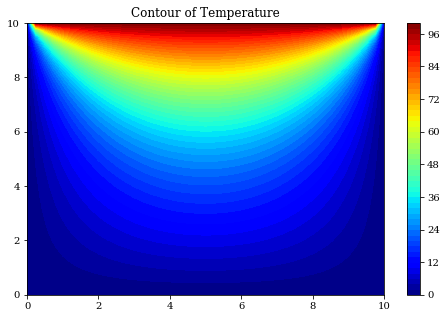

In [6]:
# Iteration
print("Please wait for a moment")

while (l2norm>1e-4):
    Tn=T.copy()
    #T[1:-1,1:-1] = .25 * (Tn[1:-1,2:] + Tn[1:-1,:-2] + Tn[2:,1:-1] + Tn[:-2,1:-1]) #substituir pelos for's de i,j

    for i in range(1,nx-1):
        for j in range(1,ny-1):
            T[i, j] = 0.25 * (Tn[i+1][j] + Tn[i-1][j] + Tn[i][j+1] + Tn[i][j-1])
    
    l2norm = L2_error(T, Tn)
    #l2norm = np.sqrt(np.sum((Tn - T)**2)/np.sum(Tn**2))
    iterations += 1
    l2_conv.append(l2norm)
    
    #print("Iterations %d is %.8f  " % (iterations, l2norm))
    
    if (iterations>=maxIter):
        break

print("Iteration finished")
print ("Jacobi method took {} iterations at tolerance {}".\
        format(iterations, l2norm))

plt.figure(figsize=(8,5))
# Configure the contour
plt.title("Contour of Temperature")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)

# Set Colorbar
plt.colorbar()

# Show the result in the plot window
plt.show()

print("")

### Convergência algébrica
Lembre-se que salvamos a norma L2 da diferença entre duas iterações consecutivas. O objetivo disso foi observar como o esquema de relaxamento *converge*, no sentido algébrico: com soluções consecutivas aproximando-se cada vez mais umas das outras. Vamos usar um gráfico de linhas para isso.

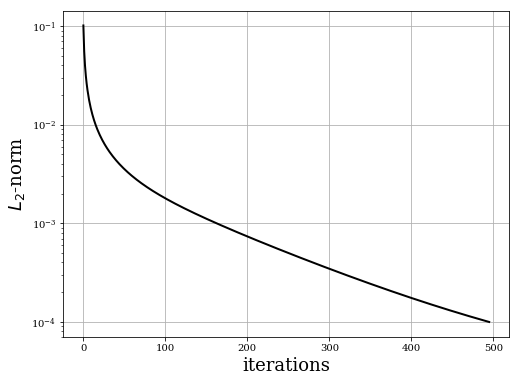

In [7]:
plt.figure(figsize=(8,6))
plt.grid(True)
plt.xlabel(r'iterations', fontsize=18)
plt.ylabel(r'$L_2$-norm', fontsize=18)
plt.semilogy(np.arange(len(l2_conv)), l2_conv, lw=2, color='k');

Parece que no início, as iterações começaram a convergir rapidamente, mas rapidamente adotaram uma taxa mais lenta. Como vimos antes, foram necessárias mais de ??? iterações para chegar à nossa meta de diferença entre duas soluções consecutivas (na norma L2). Isso é muita iterações, e nós realmente gostaríamos de relaxar mais rápido! Não se preocupe, vamos aprender a fazer isso no próximo notebook.

In [8]:
from IPython.core.display import HTML
css_file = '../styles/custom.css'
HTML(open(css_file, "r").read())